In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/StressLevelDataset.csv')

In [2]:
df.head(7)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,2,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,4,4,5,1,4,1,3,2,2,1,0


In [3]:
# Splitting dataset to features (X) and target column (y)  
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [4]:
# Splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Creating a StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training models

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [7]:
# Models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial'),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

In [8]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(name, "-", model.score(X_test_scaled, y_test))

C:\Users\LEGION\Desktop\student-monitoring\app\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - 0.8818181818181818
SVM - 0.8545454545454545
Random Forest - 0.8772727272727273
Gradient Boosting - 0.8909090909090909
XGBoost - 0.8727272727272727


### Hyperparameter tuning

In [9]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train_scaled, y_train)
print("Best RF:", rf_random.best_params_)
print("Best RF score:", f"{rf_random.best_score_:.4f}")

Best RF: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5}
Best RF score: 0.8898


In [10]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4],
    "subsample": [0.6, 0.8, 1.0]
}

gb = GradientBoostingClassifier()

gb_random = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

gb_random.fit(X_train_scaled, y_train)
print("Best GB:", gb_random.best_params_)
print("Best GB score:", f"{gb_random.best_score_:.4f}")

Best GB: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best GB score: 0.8864


In [11]:
param_dist = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(eval_metric="mlogloss")

xgb_random = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train_scaled, y_train)
print("Best XGB:", xgb_random.best_params_)
print("Best XGB score:", f"{xgb_random.best_score_:.4f}")

Best XGB: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best XGB score: 0.8841


In [12]:
from sklearn.metrics import accuracy_score

param_dist = {
    "n_estimators": np.arange(200, 600, 50),
    "learning_rate": [0.005, 0.01, 0.02, 0.03, 0.05],
    "max_depth": [3, 4, 5, 6],
    "min_child_weight": [1, 2, 3, 4],
    "gamma": [0, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 0.5],
    "reg_lambda": [1, 2, 3]
}

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",      
    random_state=42,
    n_jobs=-1
)

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,               
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(
    X_train_scaled,
    y_train,
)

print("\nBest XGB params:", xgb_random.best_params_)
print("Best CV score:", round(xgb_random.best_score_, 4))

best_xgb = xgb_random.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", round(test_acc, 4))

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best XGB params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 250, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best CV score: 0.8875
Test accuracy: 0.8682


### Metrics for GradientBoostingClassifier

In [14]:
from sklearn.metrics import classification_report

gb_model = GradientBoostingClassifier() 
gb_model.fit(X_train_scaled, y_train)

y_pred = gb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        76
           1       0.90      0.89      0.90        73
           2       0.92      0.92      0.92        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



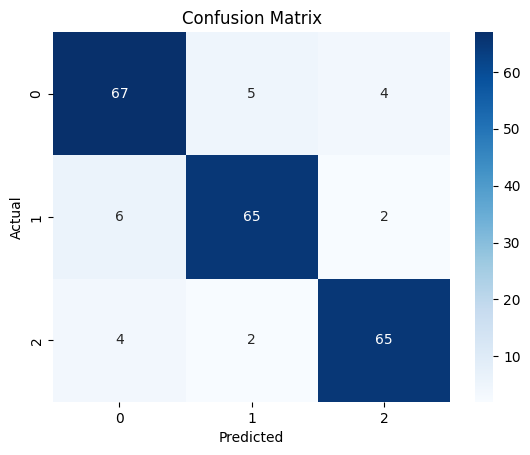

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Fitting and exporting pipeline

In [19]:
import joblib

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", GradientBoostingClassifier())
])

pipeline.fit(X_train, y_train)

print("Test accuracy:", pipeline.score(X_test, y_test))

Test accuracy: 0.8954545454545455


In [20]:
joblib.dump(pipeline, "../pickles/pipeline.pkl")

['../pickles/pipeline.pkl']